OBSERVATIONS 

1.From the BoxPlot figure. The most effective form of Treatment against tumors are the Capomulin and Ramicane because they have the least growth of the final tumor

2.The Linear Regression line shows a positive relationship between  weight of a mouse and the average tumor volume

3.from the barcharts, the least successful form of treatment against growth of tumors is use of propriva


In [179]:
#Dependancies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import random
from scipy.stats import linregress


In [180]:
# Study data files
mouse_metadata = "Pymaceuticals/data/Mouse_metadata.csv"
study_results = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single data
combined_pymaceutical_data = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")

combined_pymaceutical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [181]:
# Summary Statistics

#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
tumor_vol_groupby_mean = combined_pymaceutical_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_vol_groupby_median = combined_pymaceutical_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_vol_groupby_std_Dev = combined_pymaceutical_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_vol_groupby_var = combined_pymaceutical_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_vol_groupby_std = combined_pymaceutical_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

tumor_vol_dataframe = pd.DataFrame({"Mean Tumor Volume":tumor_vol_groupby_mean,
                                   "Median Tumor Volume":tumor_vol_groupby_median,
                                    "Tumor Volume Variance":tumor_vol_groupby_var,
                                   "Tumor Volume Std.Dev.":tumor_vol_groupby_std_Dev,
                                  })
tumor_vol_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [182]:
tumor_vol_groupby_sem = combined_pymaceutical_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
        
tumor_vol_dataframe = pd.DataFrame({"Mean":tumor_vol_groupby_mean,
                                   "Median":tumor_vol_groupby_median,
                                    "Variance":tumor_vol_groupby_var,
                                   "std":tumor_vol_groupby_std_Dev,
                                     "Sem":tumor_vol_groupby_sem

                                  })
tumor_vol_dataframe

,Mean,Median,Variance,std,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [183]:
# Generating a bar plot showing the number of data points for each treatment regimen using pandas

#Grouping to get the data points
grouped_datapoints = combined_pymaceutical_data.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
grouped_datapoints


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

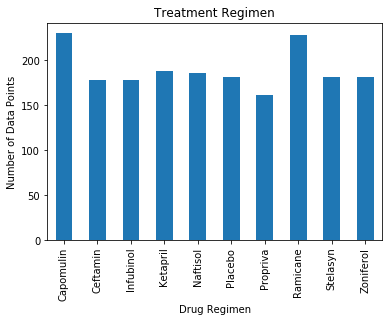

In [184]:
# Generating the bar plot

Pandas = pd.DataFrame(grouped_datapoints)

barplot= Pandas.plot.bar(legend=False, rot=90)
plt.title("Treatment Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

plt.savefig("Pandas Bar")

plt.show()


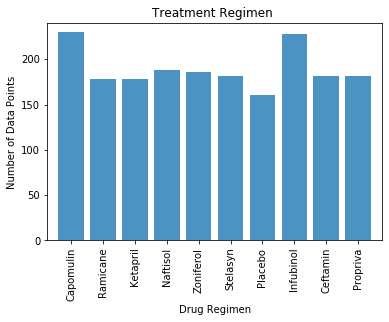

In [185]:
# Generating a bar plot showing the number of data points for each treatment regimen using pyplot

#generating y and x Axis
points = [230,178,178,188,186,181,161,228,181,182]
x_axis = np.arange(len(points))

#making the bar chart
plt.bar(x_axis,points,alpha=0.8, align="center")


#placing x_axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo",
                          "Infubinol","Ceftamin","Propriva"],
          rotation="vertical")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(points)+10)

# Assigning title and labels

plt.title("Treatment Regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig("Pyplot Bar")

plt.show()


/Users/Nimmoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


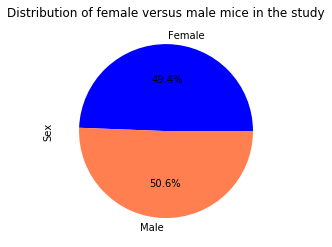

In [186]:
# Generating a pie plot showing the distribution of female mice versus male mice using pandas

gender_grouping = combined_pymaceutical_data.groupby("Sex").count()

labels= combined_pymaceutical_data["Sex"].unique()
labels
gender_sizes = [gender_grouping["Mouse ID"]]
gender_sizes

 #plotting
colors = ["blue", "coral"]
plt.pie(gender_sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Distribution of female versus male mice in the study")
plt.ylabel("Sex")

plt.savefig("PieChart of Pandas")

plt.show()



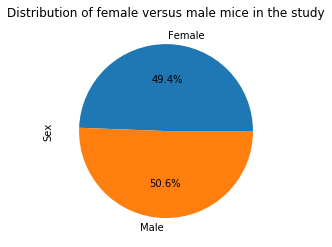

In [187]:
#Generating a pie plot showing the distribution of females versus male mice using pyplot

pyplot_version = gender_grouping["Mouse ID"].plot.pie(y="gender_sizes",autopct="%1.1f%%",figsize=(4,4))
plt.ylabel("Sex")
plt.title("Distribution of female versus male mice in the study")

plt.savefig("PieChart of PyPlot")
plt.show()

In [188]:
# Quartiles, Outliers and Boxplots

# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.  

#loc The drug Regimens
capomulin = combined_pymaceutical_data.loc[combined_pymaceutical_data["Drug Regimen"] == "Capomulin",:]
ramicane= combined_pymaceutical_data.loc[combined_pymaceutical_data["Drug Regimen"] == "Ramicane", :]
infubinol = combined_pymaceutical_data.loc[combined_pymaceutical_data["Drug Regimen"] == "Infubinol", :]
ceftamin = combined_pymaceutical_data.loc[combined_pymaceutical_data["Drug Regimen"] == "Ceftamin", :]

#Capomulin Grouping and merging
capomulin_grouping = capomulin.groupby('Mouse ID').max()['Timepoint']
capomulin_last_tumor_vol = pd.DataFrame(capomulin_grouping)
capomulinmerge = pd.merge(capomulin_last_tumor_vol, combined_pymaceutical_data, on=("Mouse ID","Timepoint"))
capomulinmerge
#finding the quartiles and Outliers for Capomulin

capo_final_tumor_vol_mouse = capomulinmerge["Tumor Volume (mm3)"]

quartiles = capo_final_tumor_vol_mouse.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Printing the quartiles and outliers of Capomulin

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")

print(f"Capomulin above {upper_bound} could be outliers.")
print(f"Capomulin below {lower_bound} could be outliers.")
print(f"The interquartile range of Capomulin is: {iqr}")

print(f".................................................")


#Ramicane Grouping and merging

ramicane_grouping = ramicane.groupby('Mouse ID').max()['Timepoint']
ramicane_last_tumor_vol = pd.DataFrame(ramicane_grouping)
ramicanemerge = pd.merge(ramicane_last_tumor_vol, combined_pymaceutical_data, on=("Mouse ID","Timepoint"))
#Outliers for Ramicane
rami_final_tumor_vol_mouse = ramicanemerge["Tumor Volume (mm3)"]

#finding the quartiles and Outliers for Ramicane

quartiles = rami_final_tumor_vol_mouse.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Printing the quartiles and outliers of Ramicane


print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")

print(f"Ramicane above {upper_bound} could be outliers.")
print(f"Ramicane below {lower_bound} could be outliers.")
print(f"The interquartile range of Ramicane is: {iqr}")

print(f".................................................")

# Infubinol Grouping and merging

infubinol_grouping = infubinol.groupby('Mouse ID').max()['Timepoint']
infubinol_last_tumor_vol = pd.DataFrame(infubinol_grouping)
infubinolmerge = pd.merge(infubinol_last_tumor_vol, combined_pymaceutical_data, on=("Mouse ID","Timepoint"))


#finding the quartiles and Outliers for Infubinol
infu_final_tumor_vol_mouse = infubinolmerge["Tumor Volume (mm3)"]

quartiles = infu_final_tumor_vol_mouse.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Printing the quartiles and outliers of infubinol

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")

print(f"Infubinol above {upper_bound} could be outliers.")
print(f"Infubinol below {lower_bound} could be outliers.")
print(f"The interquartile range of Infubinol is: {iqr}")


print(f".................................................")


# Ceftamin Grouping and merging

ceftamin_grouping = ceftamin.groupby('Mouse ID').max()['Timepoint']
ceftamin_last_tumor_vol = pd.DataFrame(ceftamin_grouping)
ceftaminmerge = pd.merge(ceftamin_last_tumor_vol, combined_pymaceutical_data, on=("Mouse ID","Timepoint"))

#Finding the quartiles and Outliers of Ceftamin

ceft_final_tumor_vol_mouse = ceftaminmerge["Tumor Volume (mm3)"]

quartiles = ceft_final_tumor_vol_mouse.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


# Printing the quartiles and outliers
print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")

print(f"Ceftamin above {upper_bound} could be outliers.")
print(f"Ceftamin below {lower_bound} could be outliers.")
print(f"The interquartile range of Ceftamin is: {iqr}")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
Capomulin above 51.83201549 could be outliers.
Capomulin below 20.70456164999999 could be outliers.
The interquartile range of Capomulin is: 7.781863460000004
.................................................
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
Ramicane above 54.30681135 could be outliers.
Ramicane below 17.912664470000003 could be outliers.
The interquartile range of Ramicane is: 9.098536719999998
.................................................
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
Infubinol above 82.74144559000001 could be outliers.
Infubinol below 36.83290494999999 could be outliers.
The interquartile range of Infubinol is: 11.477135160000003
.................................................
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 6

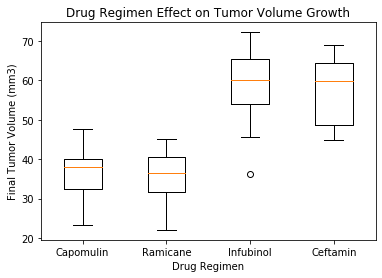

In [189]:
# Generating the boxplot

box_plot = [capo_final_tumor_vol_mouse,rami_final_tumor_vol_mouse,infu_final_tumor_vol_mouse,ceft_final_tumor_vol_mouse]

fig1, ax1 = plt.subplots()

ax1.set_title('Drug Regimen Effect on Tumor Volume Growth')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(box_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])

green_di = dict(markerfacecolor="g", marker='D')

plt.savefig("Boxplot")

plt.show()





In [190]:
#Line and scatter plots

#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#locating Mouse ID l509 

mousel509 = combined_pymaceutical_data.loc[combined_pymaceutical_data["Mouse ID"] =="l509"]
mousel509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207289,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


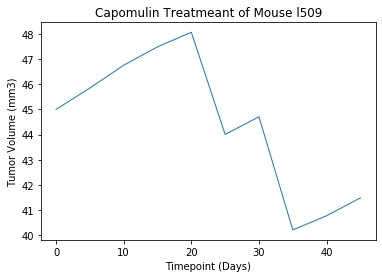

In [191]:
# Generating the line plot 

column1 = mousel509["Timepoint"]
column2 = mousel509["Tumor Volume (mm3)"]

plt.plot(column1, column2,linewidth=1, markersize=12)

plt.title('Capomulin Treatmeant of Mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()


In [192]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen 

# Getting data for Capomulin Regimen
capomulin_table = combined_pymaceutical_data.loc[combined_pymaceutical_data["Drug Regimen"] == "Capomulin"]
capomulin_table = capomulin_df.reset_index()
capomulin_table.head()

,level_0,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [193]:
reduced_capomulin_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
# reduced_capomulin_df.head()

#AVG tumor for each mouse with Capomulin (Grouping)
avg_tumor = pd.DataFrame(reduced_capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_tumor.head()



,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


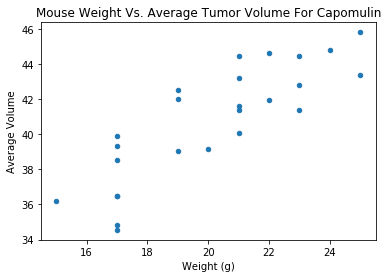

In [194]:
# Rename Tumor Volume column
avg_tumor = avg_tumor.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_tumor.head()

#Scatter plot

avg_tumor.plot(kind="scatter", x="Weight (g)", y="Average Volume", figsize=(6,4),
              title="Mouse Weight Vs. Average Tumor Volume For Capomulin")
plt.savefig("Scatter Plot")
plt.show()

In [195]:
#Calculating the correlation Coefficient

mouse_weight = avg_tumor.iloc[:,1]
averageTV=avg_tumor.iloc[:,2]

correlation=st.pearsonr(mouse_weight,averageTV)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


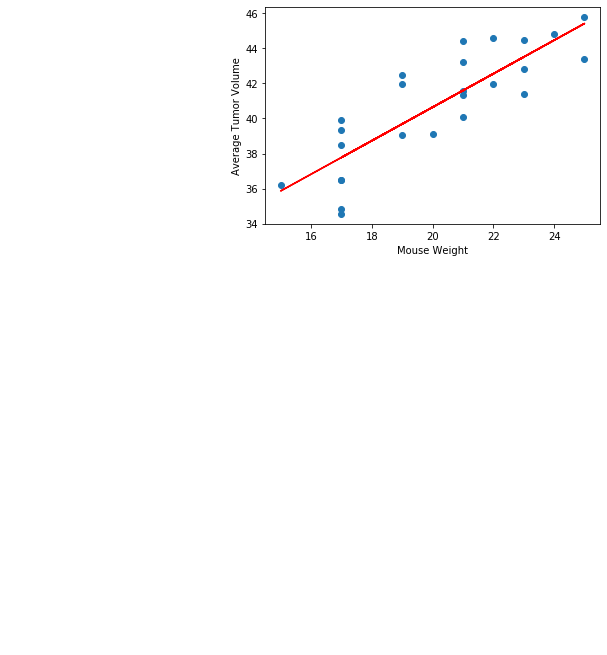

<Figure size 432x288 with 0 Axes>

In [197]:
# Generating the scatter and adding the linear regression model for mouse weight and average tumor volume for the Capomulin regimen 
# plt.scatter(avg_tumor.iloc[:,1],avg_tumor.iloc[:,2])
# plt.title("Mouse Weight Vs. Average Tumor Volume For Capomulin")
# plt.xlabel("Weight (g)")
# plt.ylabel("Average Tumor Volume (mm3)")

x_values = avg_tumor['Weight (g)']
y_values = avg_tumor['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

plt.savefig("Linear Regression")
plt.show()